# Signal PTOFS




98.28009828009827 409.5004095004095


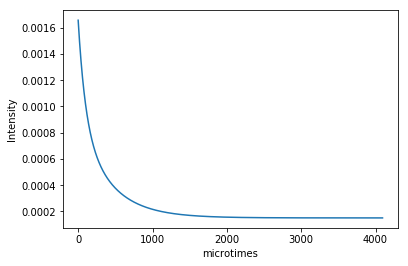

In [36]:
import numpy as np
import matplotlib.pyplot as plt 

nb_microtime_channel = 4095
microtime_resolution = 0.01221

def two_exp_decay(t, t0, cst, a1, tau1, tau2):
    decay = cst + a1 * np.exp(-(t - t0) / tau1) + (1-a1) * np.exp(-(t - t0) / tau2)
    decay[t <t0] = cst
    return decay/decay.sum()


# In microtimes
t0 = 0
cst = 0.1
a1 = 0.5
tau1 = 1.2 / microtime_resolution
tau2 = 5 / microtime_resolution

print(tau1, tau2)

microtimes = np.arange(0,nb_microtime_channel)
decay = two_exp_decay(microtimes, t0, cst, a1, tau1, tau2)
plt.plot(microtimes, decay)
plt.xlabel("microtimes")
plt.ylabel("Intensity")
plt.show()

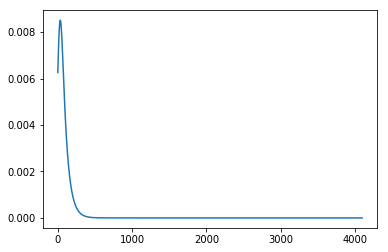

In [45]:
from scipy.special import  erfc

def exgauss(t, mu, sig, tau):
    lam = 1. / tau
    return 0.5 * lam * np.exp(0.5 * lam * (2 * mu + lam * (sig ** 2) - 2 * t)) * \
           erfc((mu + lam * (sig ** 2) - t) / (np.sqrt(2) * sig))

IRF = exgauss(microtimes, mu=0, sig=0.4/microtime_resolution, tau=0.8/microtime_resolution)
IRF /= IRF.sum() 
plt.plot(microtimes, IRF)
plt.show()


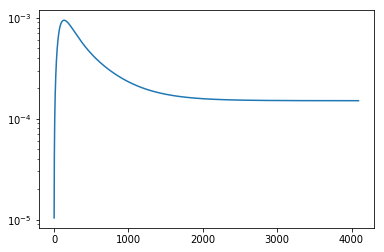

In [47]:
convolved_decay = np.convolve(decay, IRF)[0:nb_microtime_channel]
plt.semilogy(microtimes, convolved_decay)
plt.show()

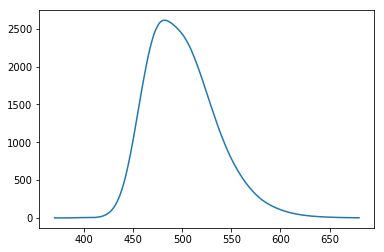

In [25]:
wl_spectrum = [ 370.0, 371.0, 372., 373., 374., 375., 376., 377., 378., 379., 380., 381.,
  382.0, 383., 384.0, 385., 386., 387., 388., 389., 390., 391., 392., 393.,
  394., 395., 396., 397., 398., 399., 400., 401., 402., 403., 404., 405.,
  406., 407., 408., 409., 410., 411., 412., 413., 414., 415., 416., 417.,
  418., 419., 420., 421., 422., 423., 424., 425., 426., 427., 428., 429.,
  430., 431., 432., 433., 434., 435., 436., 437., 438., 439., 440., 441.,
  442., 443., 444., 445., 446., 447., 448., 449., 450., 451., 452., 453.,
  454., 455., 456., 457., 458., 459., 460., 461., 462., 463., 464., 465.,
  466., 467., 468., 469., 470., 471., 472., 473., 474., 475., 476., 477.,
  478., 479., 480., 481., 482., 483., 484., 485., 486., 487., 488., 489.,
  490., 491., 492., 493., 494., 495., 496., 497., 498., 499., 500., 501.,
  502., 503., 504., 505., 506., 507., 508., 509., 510., 511., 512., 513.,
  514., 515., 516., 517., 518., 519., 520., 521., 522., 523., 524., 525.,
  526., 527., 528., 529., 530., 531., 532., 533., 534., 535., 536., 537.,
  538., 539., 540., 541., 542., 543., 544., 545., 546., 547., 548., 549.,
  550., 551., 552., 553., 554., 555., 556., 557., 558., 559., 560., 561.,
  562., 563., 564., 565., 566., 567., 568., 569., 570., 571., 572., 573.,
  574., 575., 576., 577., 578., 579., 580., 581., 582., 583., 584., 585.,
  586., 587., 588., 589., 590., 591., 592., 593., 594., 595., 596., 597.,
  598., 599., 600., 601., 602., 603., 604., 605., 606., 607., 608., 609.,
  610., 611., 612., 613., 614., 615., 616., 617., 618., 619., 620., 621.,
  622., 623., 624., 625., 626., 627., 628., 629., 630., 631., 632., 633.,
  634., 635., 636., 637., 638., 639., 640., 641., 642., 643., 644., 645.,
  646., 647., 648., 649., 650., 651., 652., 653., 654., 655., 656., 657.,
  658., 659., 660., 661., 662., 663., 664., 665., 666., 667., 668., 669.,
  670., 671., 672., 673., 674., 675., 676., 677., 678., 679., 680.]

spectrum = [  1.04895000e+00,  9.33285000e-01,  8.68798000e-01,  7.92560000e-01,
   8.20821000e-01,  8.06122000e-01,  7.96438000e-01,  7.84092000e-01,
   7.56688000e-01,  7.41405000e-01,  7.27557000e-01,  7.31685000e-01,
   7.62201000e-01,  7.95354000e-01,  8.83002000e-01,  1.04451000e+00,
   1.30560000e+00,  1.63072000e+00,  2.04011000e+00,  2.48888000e+00,
   2.97329000e+00,  3.48973000e+00,  3.90739000e+00,  4.23878000e+00,
   4.47649000e+00,  4.65173000e+00,  4.74503000e+00,  4.82108000e+00,
   4.91423000e+00,  4.98562000e+00,  5.07092000e+00,  5.09206000e+00,
   5.06870000e+00,  4.97966000e+00,  4.92701000e+00,  4.85258000e+00,
   4.78415000e+00,  4.82014000e+00,  4.93192000e+00,  5.23459000e+00,
   5.87137000e+00,  6.72371000e+00,  7.88587000e+00,  9.24728000e+00,
   1.08848000e+01,  1.29422000e+01,  1.54012000e+01,  1.81996000e+01,
   2.16165000e+01,  2.54690000e+01,  3.00888000e+01,  3.53200000e+01,
   4.15342000e+01,  4.87550000e+01,  5.68853000e+01,  6.62845000e+01,
   7.69219000e+01,  8.89202000e+01,  1.02257000e+02,  1.17969000e+02,
   1.35405000e+02,  1.54536000e+02,  1.75862000e+02,  1.99611000e+02,
   2.25464000e+02,  2.54146000e+02,  2.85558000e+02,  3.20135000e+02,
   3.57394000e+02,  3.97594000e+02,  4.41431000e+02,  4.88078000e+02,
   5.37643000e+02,  5.90756000e+02,  6.47436000e+02,  7.07023000e+02,
   7.68243000e+02,  8.32555000e+02,  8.99346000e+02,  9.68333000e+02,
   1.03915000e+03,  1.11243000e+03,  1.18661000e+03,  1.26204000e+03,
   1.33723000e+03,  1.41332000e+03,  1.49036000e+03,  1.56636000e+03,
   1.64188000e+03,  1.71641000e+03,  1.78944000e+03,  1.86042000e+03,
   1.92996000e+03,  1.99688000e+03,  2.06173000e+03,  2.12354000e+03,
   2.18281000e+03,  2.23788000e+03,  2.28863000e+03,  2.33731000e+03,
   2.38219000e+03,  2.42255000e+03,  2.45906000e+03,  2.49048000e+03,
   2.51788000e+03,  2.54205000e+03,  2.56349000e+03,  2.58044000e+03,
   2.59334000e+03,  2.60275000e+03,  2.60925000e+03,  2.61288000e+03,
   2.61378000e+03,  2.61247000e+03,  2.60985000e+03,  2.60581000e+03,
   2.59825000e+03,  2.59043000e+03,  2.58225000e+03,  2.57406000e+03,
   2.56468000e+03,  2.55327000e+03,  2.54174000e+03,  2.53012000e+03,
   2.51773000e+03,  2.50545000e+03,  2.49183000e+03,  2.47737000e+03,
   2.46330000e+03,  2.44675000e+03,  2.43015000e+03,  2.41373000e+03,
   2.39291000e+03,  2.37278000e+03,  2.35139000e+03,  2.32821000e+03,
   2.30437000e+03,  2.27810000e+03,  2.25220000e+03,  2.22358000e+03,
   2.19330000e+03,  2.16258000e+03,  2.12984000e+03,  2.09650000e+03,
   2.06393000e+03,  2.02828000e+03,  1.99261000e+03,  1.95597000e+03,
   1.91888000e+03,  1.88239000e+03,  1.84461000e+03,  1.80476000e+03,
   1.76586000e+03,  1.72553000e+03,  1.68691000e+03,  1.64704000e+03,
   1.60705000e+03,  1.56805000e+03,  1.52912000e+03,  1.48985000e+03,
   1.45130000e+03,  1.41172000e+03,  1.37361000e+03,  1.33527000e+03,
   1.29836000e+03,  1.26038000e+03,  1.22313000e+03,  1.18724000e+03,
   1.15255000e+03,  1.11793000e+03,  1.08429000e+03,  1.05012000e+03,
   1.01744000e+03,  9.86254000e+02,  9.54815000e+02,  9.24197000e+02,
   8.94604000e+02,  8.65629000e+02,  8.36920000e+02,  8.09319000e+02,
   7.82857000e+02,  7.56733000e+02,  7.31597000e+02,  7.07625000e+02,
   6.83332000e+02,  6.59852000e+02,  6.37676000e+02,  6.15474000e+02,
   5.94327000e+02,  5.73109000e+02,  5.52038000e+02,  5.32605000e+02,
   5.13612000e+02,  4.94761000e+02,  4.76550000e+02,  4.59421000e+02,
   4.42849000e+02,  4.25856000e+02,  4.09620000e+02,  3.94114000e+02,
   3.78599000e+02,  3.63796000e+02,  3.49686000e+02,  3.35870000e+02,
   3.22342000e+02,  3.09525000e+02,  2.97149000e+02,  2.85255000e+02,
   2.73587000e+02,  2.62489000e+02,  2.51701000e+02,  2.41478000e+02,
   2.31791000e+02,  2.22830000e+02,  2.13860000e+02,  2.05190000e+02,
   1.96968000e+02,  1.89162000e+02,  1.81542000e+02,  1.74168000e+02,
   1.67026000e+02,  1.60227000e+02,  1.53920000e+02,  1.47900000e+02,
   1.41882000e+02,  1.36004000e+02,  1.30378000e+02,  1.24962000e+02,
   1.19801000e+02,  1.14565000e+02,  1.09547000e+02,  1.04953000e+02,
   1.00480000e+02,  9.59312000e+01,  9.18377000e+01,  8.77438000e+01,
   8.37474000e+01,  8.00687000e+01,  7.64437000e+01,  7.29745000e+01,
   6.94559000e+01,  6.63844000e+01,  6.35379000e+01,  6.06446000e+01,
   5.78216000e+01,  5.51813000e+01,  5.25285000e+01,  5.00373000e+01,
   4.78073000e+01,  4.56104000e+01,  4.33556000e+01,  4.13249000e+01,
   3.93462000e+01,  3.75811000e+01,  3.59253000e+01,  3.42049000e+01,
   3.26394000e+01,  3.11308000e+01,  2.95778000e+01,  2.81077000e+01,
   2.68152000e+01,  2.54705000e+01,  2.43435000e+01,  2.33150000e+01,
   2.22318000e+01,  2.10670000e+01,  2.01764000e+01,  1.92392000e+01,
   1.83591000e+01,  1.74844000e+01,  1.65991000e+01,  1.57474000e+01,
   1.49868000e+01,  1.42797000e+01,  1.36384000e+01,  1.29915000e+01,
   1.24165000e+01,  1.18539000e+01,  1.13166000e+01,  1.07554000e+01,
   1.02356000e+01,  9.73738000e+00,  9.27528000e+00,  8.84612000e+00,
   8.46125000e+00,  7.99377000e+00,  7.59325000e+00,  7.19090000e+00,
   6.81799000e+00,  6.47925000e+00,  6.09941000e+00,  5.79545000e+00,
   5.47103000e+00,  5.16358000e+00,  4.92030000e+00,  4.65765000e+00,
   4.45399000e+00,  4.22315000e+00,  4.01558000e+00,  3.85127000e+00,
   3.66353000e+00,  3.50870000e+00,  3.39764000e+00,  3.28569000e+00,
   3.18306000e+00,  3.08266000e+00,  2.94076000e+00,  2.85804000e+00,
   2.80961000e+00,  2.75186000e+00,  2.68555000e+00]
wl_spectrum = np.asarray(wl_spectrum)
spectrum = np.asarray(spectrum)
plt.plot(wl_spectrum, spectrum)
plt.show()

[  162774.13666824  -737842.4268673   1391212.28277842 -1403534.21762128
   806388.0639106   -254586.5576755     35649.98831485]


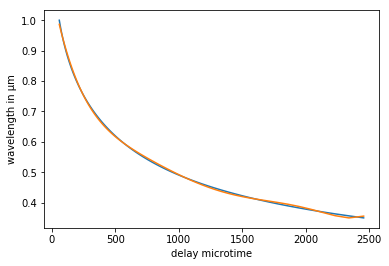

In [26]:
from scipy.constants import speed_of_light

def calculate_index_and_derivative(wl):
    """
    SellMeir coefficient for fused Silica
    :param wl:
    :return:
    """
    index = np.sqrt(1 + (0.6961663 * wl * wl) / (wl * wl - 0.0684043 * 0.0684043)
                    + (0.4079426 * wl * wl) / (wl * wl - 0.1162414 * 0.1162414)
                    + (0.8974794 * wl * wl) / (wl * wl - 9.896161 * 9.896161)
                    )

    index_derivative = \
        (
                - (1.79496 * wl * wl * wl) / (pow(-97.934 + wl * wl, 2))
                + (1.79496 * wl) / (-97.934 + wl * wl)

                - (0.815885 * wl * wl * wl) / (pow(-0.0135121 + wl * wl, 2))
                + (0.815885 * wl) / (-0.0135121 + wl * wl)

                - (1.39233 * wl * wl * wl) / (pow(-0.00467915 + wl * wl, 2))
                + (1.39233 * wl) / (-0.00467915 + wl * wl)
        ) \
        / \
        (2 * np.sqrt(
            1
            + (0.897479 * wl * wl) / (-97.934 + wl * wl)
            + (0.407943 * wl * wl) / (-0.0135121 + wl * wl)
            + (0.696166 * wl * wl) / (-0.00467915 + wl * wl)
        )
         )
    return index, index_derivative

def calculate_transit_time(wl, fiber_length):
    index, index_derivative = calculate_index_and_derivative(wl)
    group_velocity = speed_of_light / (index - wl * index_derivative)
    return fiber_length / group_velocity

def get_polynom_wl_to_micro(fiber_length, wl_calib, micro_calib, micro_time_duration_ns, deg=9, is_plot=False):
    wls = np.linspace(0.35, 1, 100)
    delays_with_calib = np.zeros(wls.size)
    transit_time_calibration = calculate_transit_time(wl_calib, fiber_length)
    i = 0
    for wl in wls:
        delays_with_calib[i] = (calculate_transit_time(wl, fiber_length) - transit_time_calibration)
        i += 1
    delays_with_calib_microtime = delays_with_calib * 1E9/micro_time_duration_ns + micro_calib

    p_fit_inv = np.polyfit(wls, delays_with_calib_microtime, deg)
    print(p_fit_inv)
    polynom_micro_to_wl = np.poly1d(p_fit_inv)
    if is_plot:
        plt.plot(delays_with_calib_microtime, wls)
        plt.plot(delays_with_calib_microtime, polynomial_interpolation_inverse(delays_with_calib_microtime))
        plt.ylabel("wavelength in µm")
        plt.xlabel("delay microtime")
        plt.show()
    return polynom_micro_to_wl

def get_polynom_micro_to_wl(fiber_length, wl_calib, micro_calib, micro_time_duration_ns, deg=9, is_plot=False):
    wls = np.linspace(0.35, 1, 100)
    delays_with_calib = np.zeros(wls.size)
    transit_time_calibration = calculate_transit_time(wl_calib, fiber_length)
    i = 0
    for wl in wls:
        delays_with_calib[i] = (calculate_transit_time(wl, fiber_length) - transit_time_calibration)
        i += 1
    delays_with_calib_microtime = delays_with_calib * 1E9/micro_time_duration_ns + micro_calib

    p_fit_inv = np.polyfit(delays_with_calib_microtime, wls, deg)
    print(p_fit_inv)
    polynom_micro_to_wl = np.poly1d(p_fit_inv)
    if is_plot:
        plt.plot(delays_with_calib_microtime, wls)
        plt.plot(delays_with_calib_microtime, polynomial_interpolation_inverse(delays_with_calib_microtime))
        plt.ylabel("wavelength in µm")
        plt.xlabel("delay microtime")
        plt.show()
    return polynom_micro_to_wl

polynom_wl_to_micro = get_polynom_wl_to_micro(fiber_length=121, wl_calib=0.531, micro_calib=800, micro_time_duration_ns=microtime_resolution, deg=6, is_plot=True)

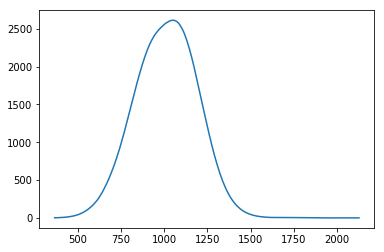

In [27]:
wl_spectrum_micro = polynom_wl_to_micro(wl_spectrum*1E-3)
plt.plot(wl_spectrum_micro, spectrum)
plt.show()


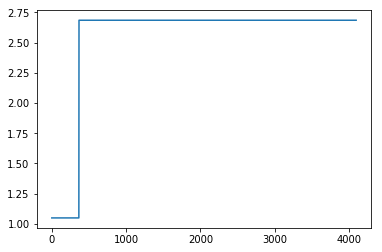

In [49]:
interpolated_spectrum_micro = np.interp(microtimes, wl_spectrum_micro, spectrum)
plt.plot(microtimes, interpolated_spectrum_micro)
plt.show()

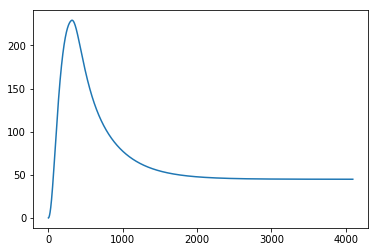

In [48]:
convolved_spectrum = np.convolve(wl_spectrum_micro, convolved_decay)[0:nb_microtime_channel]
plt.plot(microtimes, convolved_spectrum)
plt.show()
